# Analysis of German Animal Slaughter: Trends, Distribution, and Seasonal Variations

## Introduction
In Germany, the tracking of slaughter statistics is crucial for understanding the dynamics of our agricultural sector and our food production system. The aim of this narrative is to examine the trends, patterns, and seasonal fluctuations of animal slaughters in Germany. It addresses key questions such as the evolution of slaughter numbers over time, the main types of slaughtered animals, regional differences, and seasonal variations. The dataset utilized originates from the [destatis genesis online portal](https://www.destatis.de/EN/Home/_node.html), bearing the code 41331-0001. It's important to note that this dataset does not include poultry.

## Data Loading
### Imports
In this section, we import the Python libraries required for data manipulation and visualization.

We import:
- **pandas**: for data manipulation.
- **display**: for a better visualization of the data table.
- **warnings**: to suppress unnecessary warnings.
- **help_functions**: a custom module containing functions to streamline data manipulation and plotting processes.

In [1]:
import pandas as pd

In [2]:
from IPython.display import display

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from help_functions import *

### Load the dataset
We load and prepare the dataset containing information about german animal slaughter. This dataset is crucial for understanding trends and patterns in the slaughter of animals over time, across different states, and by type.

The dataset is loaded into a Pandas DataFrame named `catalog`.

In [5]:
catalog = pd.read_csv("../data/animal_slaugther_ger.csv", header=4, sep=";", encoding="latin1", skipfooter=4, engine="python")
catalog = prepare_data(catalog)

### Dataset Overview
We start by examining the structure of our dataset.

In [6]:
print("Dataset shape:", catalog.shape)

Dataset shape: (6528, 81)


For each animal species, there are six columns in the dataset. To reduce clutter and make the column names more concise, we use abbreviations that contain information about the animal species, the type of slaughter, and the type of measurement.

The abbreviations are structured as follows:

- **Do**: Domestic slaughter
- **Fo**: Foreign slaughter
- **Ho**: Home slaughter
- **Nr**: Animal count
- **T**: Quantity in tons

So, for example, a column labeled `Oxen_DoNr` would indicate the number of oxen slaughtered domestically, while a column labeled `Oxen_FoT` would indicate the quantity of oxen slaughtered from foreign sources measured in tons.

In [7]:
display(catalog)

,State,Year,Month,Oxen_DoNr,Oxen_DoT,Oxen_FoNr,Oxen_FoT,Oxen_HoNr,Oxen_HoT,Bulls_DoNr,...,Goats_FoNr,Goats_FoT,Goats_HoNr,Goats_HoT,Total Domestic(Nr),Total Foreign(Nr),Total Home(Nr),Total Domestic(t),Total Foreign(t),Total Home(t)
0,Baden-Württemberg,1991,January,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,362728.0,0.0,33362.0,47418.0,0.0,825.0
1,Baden-Württemberg,1991,February,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,337481.0,0.0,28350.0,42718.0,0.0,801.0
2,Baden-Württemberg,1991,March,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,360417.0,0.0,26734.0,45218.0,0.0,884.0
3,Baden-Württemberg,1991,April,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,377242.0,0.0,21709.0,48522.0,0.0,771.0
4,Baden-Württemberg,1991,May,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,345514.0,0.0,14990.0,44780.0,0.0,587.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,Thüringen,2024,August,...,...,...,...,...,...,...,...,...,...,...,...,0.0,0.0,0.0,0.0,0.0,0.0
6524,Thüringen,2024,September,...,...,...,...,...,...,...,...,...,...,...,...,0.0,0.0,0.0,0.0,0.0,0.0
6525,Thüringen,2024,October,...,...,...,...,...,...,...,...,...,...,...,...,0.0,0.0,0.0,0.0,0.0,0.0
6526,Thüringen,2024,November,...,...,...,...,...,...,...,...,...,...,...,...,0.0,0.0,0.0,0.0,0.0,0.0


### Summary Statistics
We also provide summary statistics for the numerical columns in the dataset to understand the dataset a little better.

In [8]:
catalog.describe()

,Year,Total Domestic(Nr),Total Foreign(Nr),Total Home(Nr),Total Domestic(t),Total Foreign(t),Total Home(t)
count,6528.00000,6.528000e+03,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000
mean,2007.50000,2.696869e+05,14838.965533,3565.469975,32836.953891,4.561275,386.193474
std,9.81146,4.062779e+05,40193.440795,7120.935741,47907.396247,157.298022,793.366604
min,1991.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1999.00000,2.303425e+04,0.000000,67.750000,3790.250000,0.000000,9.000000
50%,2007.50000,9.454400e+04,728.000000,872.500000,11527.500000,0.000000,96.000000
75%,2016.00000,3.522040e+05,6794.250000,3526.500000,38212.250000,0.000000,356.000000
max,2024.00000,1.738318e+06,373738.000000,71642.000000,204844.000000,8588.000000,7602.000000


## Analysis
### Q1: How has the number of slaughtered animals developed over time?
To answer this question, we'll generate a line plot showing the total number of domestically slaughtered animals over time.


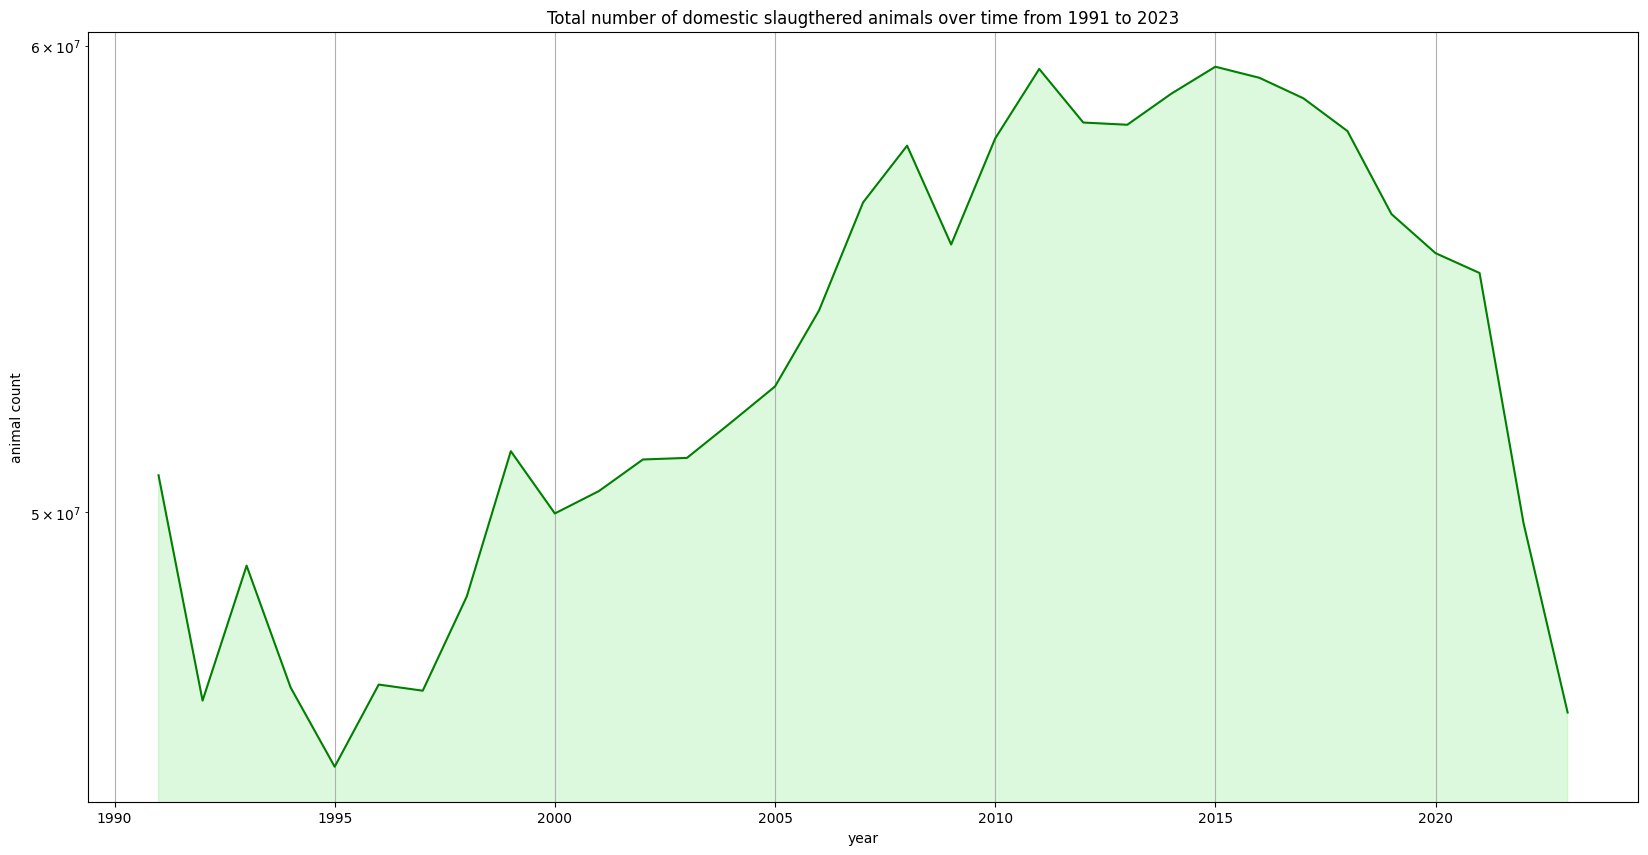

In [9]:
line_plot_total_animals_slaughtered(catalog, time_range=(1991, 2023))

In the plot, we can see that there was a strong upward trend from around 1995 to approximately 2008. From 2008 to around 2020, we observe more of a slight fluctuation without significant changes. However, from 2020 onwards, we can then observe a strong downward trend.

The upward trend could be due to a growing population in Germany, which may have increased the demand for meat. Alternatively, it could be because individuals are consuming more meat per person. However, it's likely a combination of both factors, and the plot alone doesn't provide a definitive answer. The recent downward trend might be because people are making more conscious dietary choices. Considering concerns about climate change and CO2 emissions per person, the decrease in meat consumption could be related to environmental awareness.

### Q2: What types of animals are slaughtered the most?
To determine the types of animals slaughtered the most, we will create a bar plot showing the distribution of slaughtered animals by type. This will provide a visual representation of which animal species are most commonly slaughtered. Note that the y-axis is logarithmic.


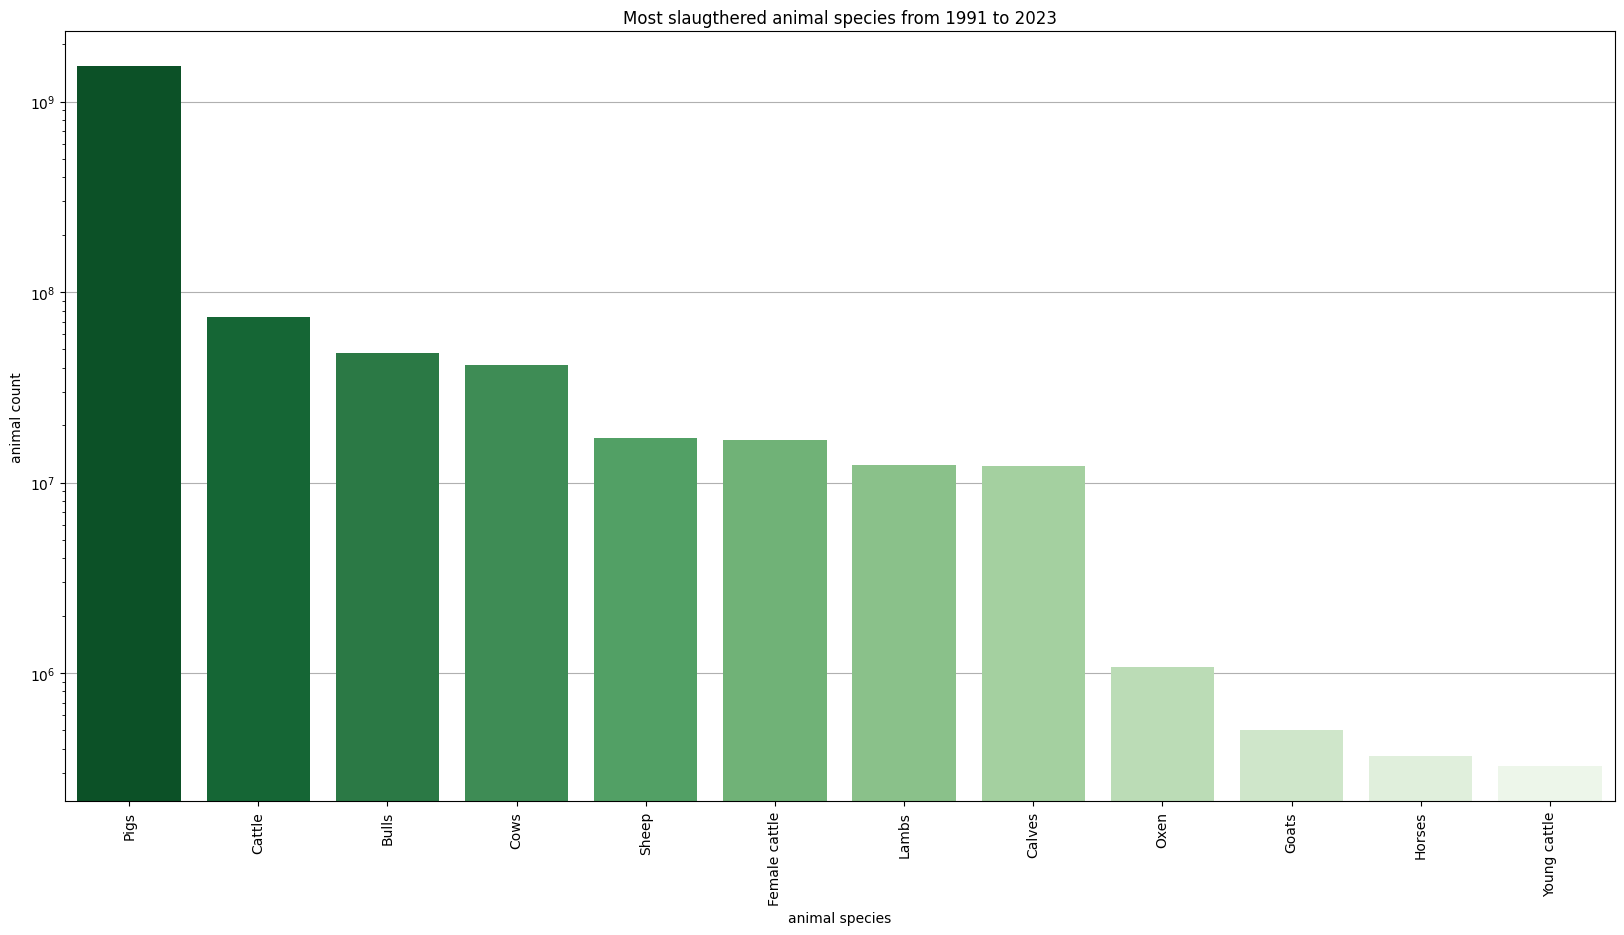

In [10]:
bar_plot_most_slaugthered_animals(catalog, time_range=(1991, 2023))

In the plot, we can see that the most slaughtered animal by a significant margin is the pig. The second most slaughtered animal is cattle, but it was only around one-tenth as often slaughtered as the pig. On the other hand, we see animals such as goats and horses, which have been slaughtered very infrequently since 1991 compared to other species. The high number of pig slaughters is likely due to the high consumption of pork in Germany. Since horses and goats are not typically part of the German diet, the low slaughter numbers for horses and goats are not surprising.

### Q3: How does the number of slaughtered animals differ between regions?
To explore variations in the number of slaughtered animals across different regions, we can generate a choropleth map plot. Additionally, to analyze how these numbers have changed over time within each state, we can create a line plot where each line represents a specific state.

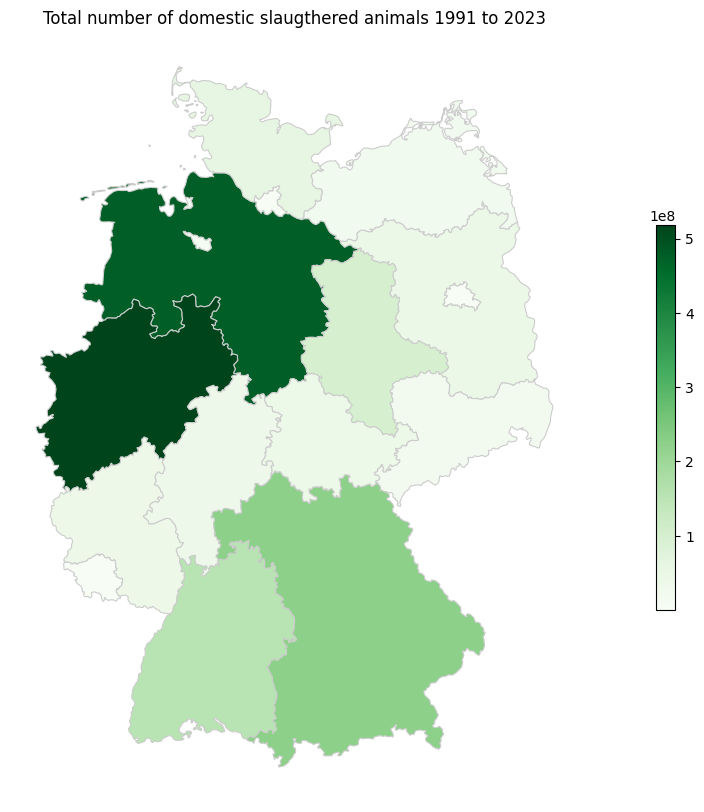

In [11]:
plot_slaughter_distribution_by_state_map(catalog, time_range=(1991, 2023))

In this plot, we can see that the federal states of Nordrhein Westfalen and Niedersachsen slaughter the most animals. Conversely, we find the city-states among the federal states that slaughter fewer animals, which makes sense given their smaller land area.

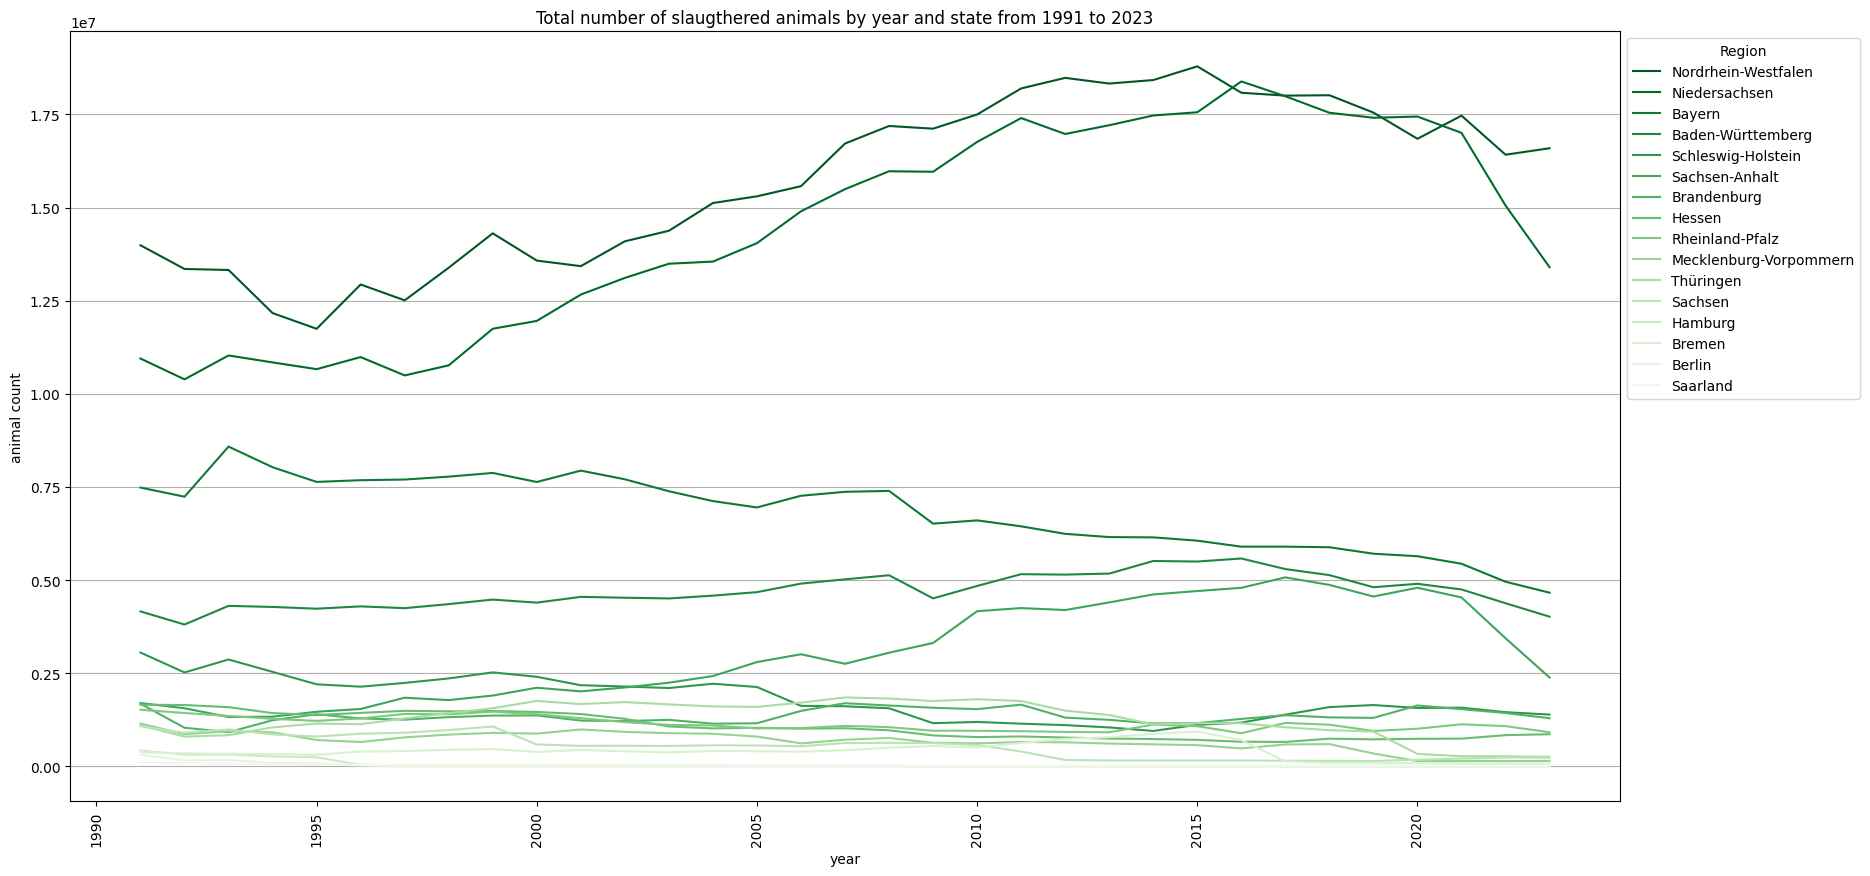

In [12]:
plot_total_animals_slaughtered_by_region(catalog, time_range=(1991, 2023))

When we consider the temporal trend, we see that Niedersachsen and Nordrhein Westfalen have consistently slaughtered the most animals since 1991. It's noteworthy that Bayern experienced a decrease in slaughter numbers while Niedersachsen and Nordrhein Westfalen saw an increase. This change could be due to a higher demand for meat products from other federal states.

### Q4: Are there seasonal fluctuations in the number of animals slaughtered?
To determine if there are seasonal fluctuations in the number of animals slaughtered, we will plot the monthly average of slaughtered animals. This will help us visualize any recurring patterns or variations across different months.

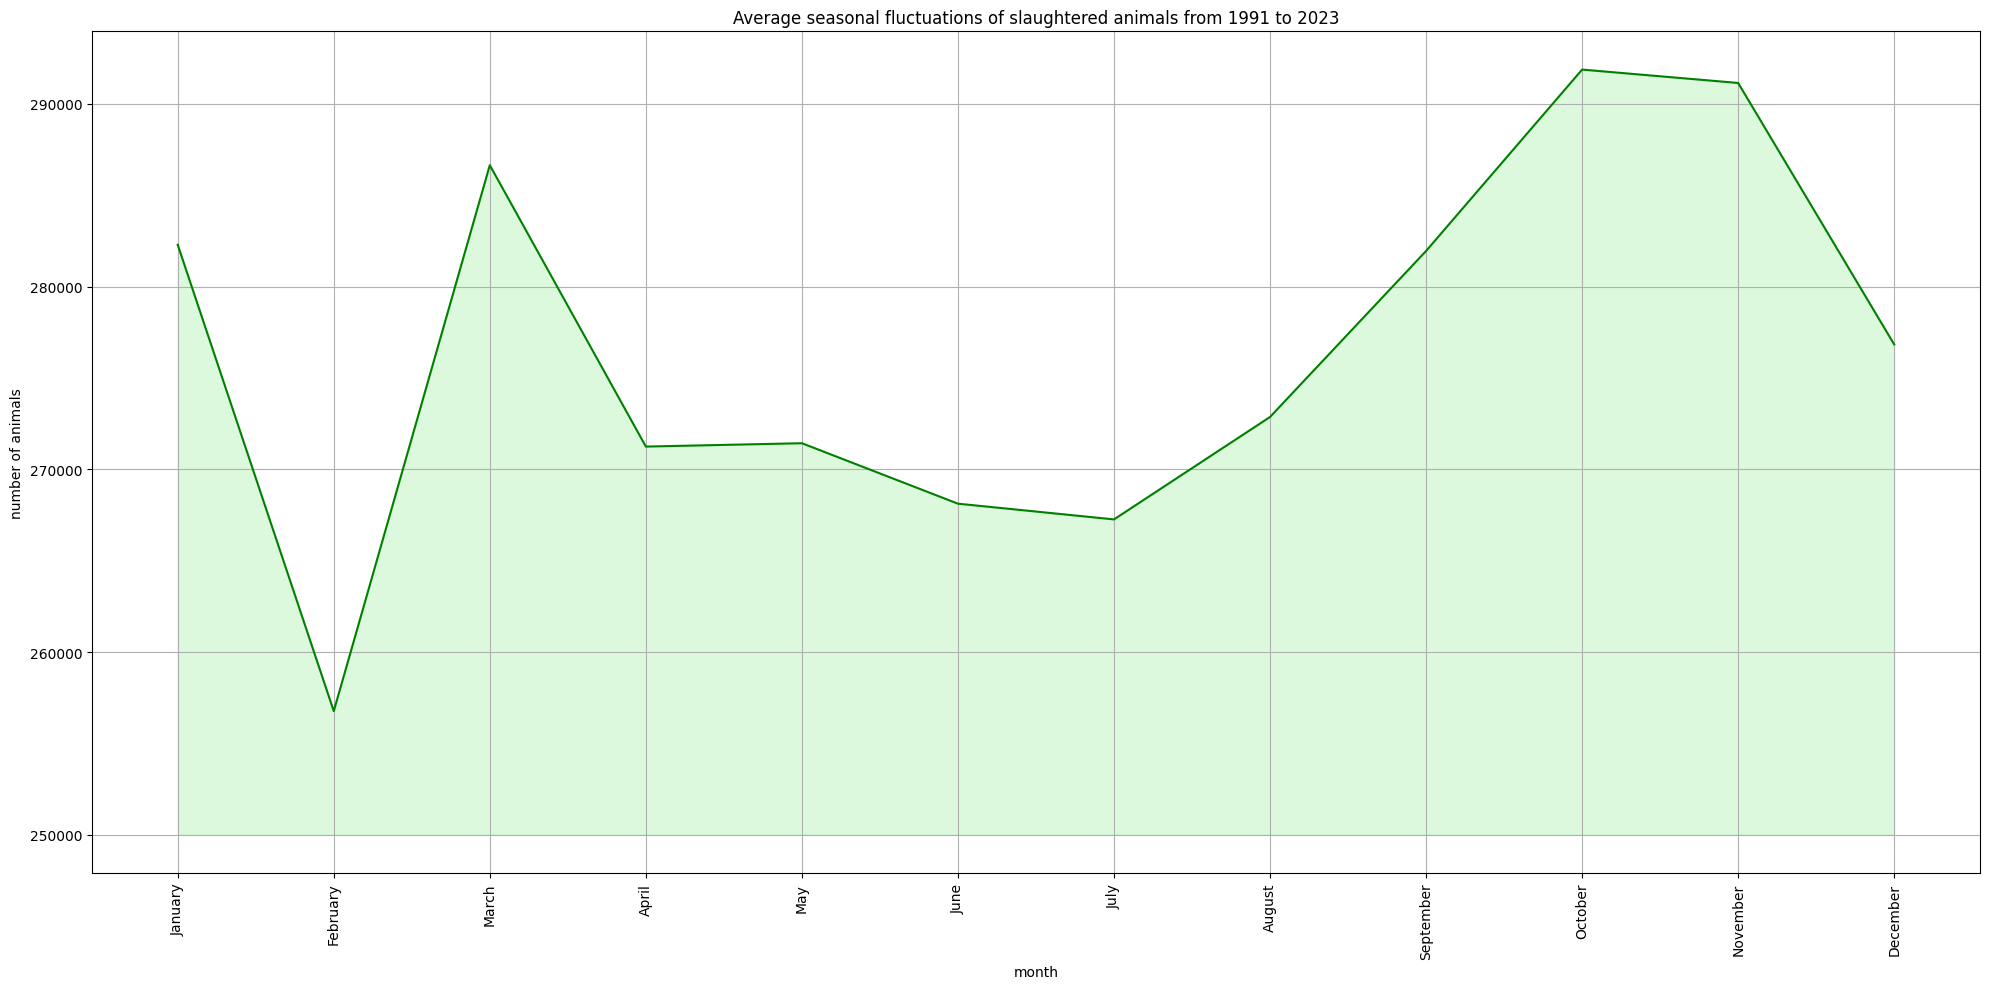

In [13]:
plot_seasonal_fluctuations(catalog, time_range=(1991, 2023))

We can see that, on average, more animals are slaughtered during autumn, with fewer in summer and February recording the lowest numbers. While the deviations are minor, they could be due to various factors like holiday consumption patterns or animal life cycles. Although it's hard to pinpoint exact reasons, it's clear there are monthly fluctuations in slaughter numbers.

### Q5: What is the distribution of slaughtered animals between domestic and home slaughter in different regions?
We'll visualize the distribution of slaughtered animals between domestic and home slaughter in different regions using a grouped bar plot. Each group will contain two bars: one showing the amount of domestically slaughtered animals and the other showing the amount of home-slaughtered animals. It's important to note that we'll be using a logarithmic scale for the y-axis to better visualize the data.

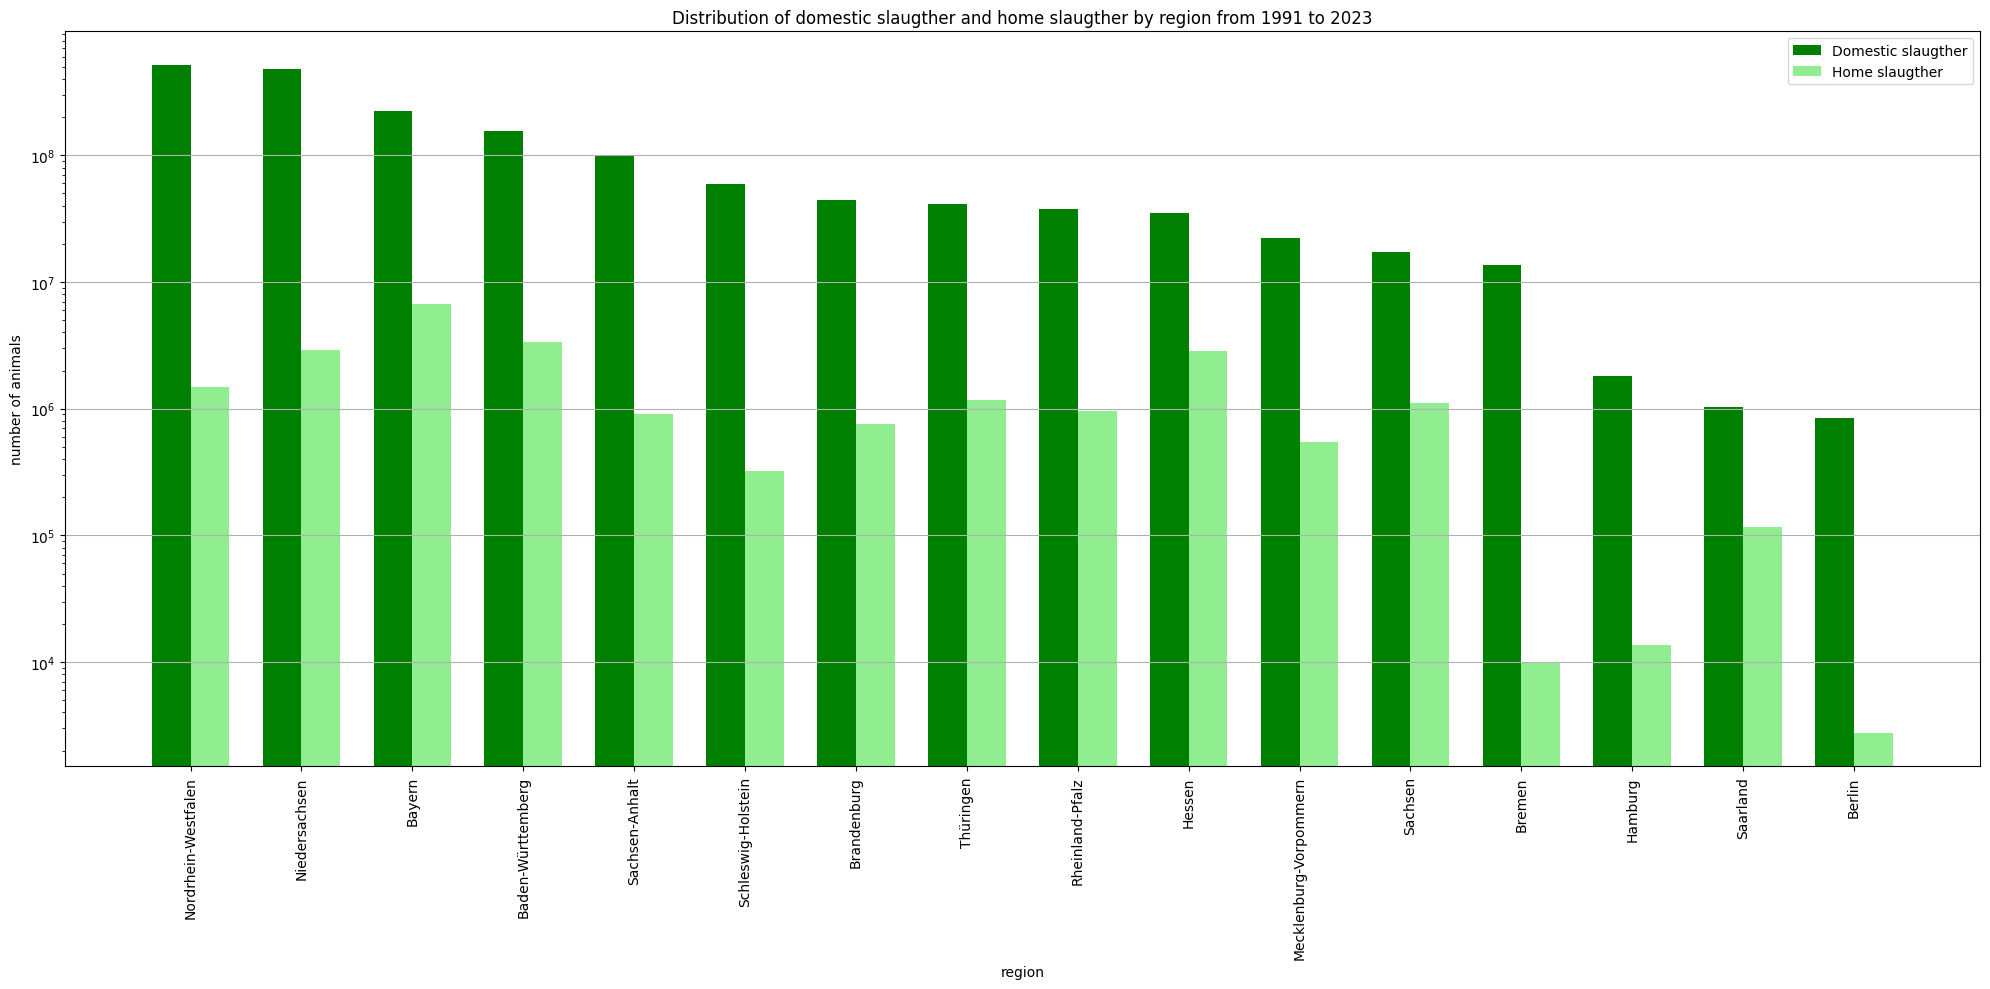

In [14]:
plot_slaughter_distribution(catalog, time_range=(1991, 2023))

As we've learned from the previous plots, Nordrhein Westfalen, Niedersachsen, and Bayern are the federal states with the highest slaughter numbers. It's interesting to note that Bayern also leads in home slaughters, with Hessen and Baden-Württemberg showing relatively high numbers as well. Conversely, the city-states continue to have lower slaughter numbers. The high numbers of home slaughters in Bayern, Hessen, and Baden Württemberg may be attributed to the presence of more individual farms or to a culturally higher regard for home slaughtering practices in southern Germany.

## Summary
In our analysis of German slaughter statistics, we identified key trends. Slaughter numbers showed an upward trend until around 2008, followed by minor fluctuations until 2020 and a subsequent decline. Pigs were the most slaughtered animals, followed by cattle, while goats and horses were rarely slaughtered. Regional variations were observed, with Nordrhein Westfalen and Niedersachsen leading in slaughter numbers, and Bayern experiencing a decline over time. Seasonal fluctuations revealed higher slaughters in autumn and summer, and lower numbers in February. The distribution of slaughter practices showed Bayern, Hessen, and Baden-Württemberg with high numbers of home slaughters, possibly due to individual farms or cultural preferences. Our analysis provides insights into the dynamics of animal slaughtering practices in Germany, highlighting trends, regional variations, and potential influences.
